<a href="https://colab.research.google.com/github/essymizo/GIS_MachineLearning/blob/main/Deep_Learning_for_Satellite_Image_Classification_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Satellite Image Classification with Python

We shall see how we can use deep learning, specifically convolutional neural networks (CNN), to classify satellite images. We will be using Python, Keras, and a dataset from [UC Merced Land Use Dataset](http://weegee.vision.ucmerced.edu/datasets/landuse.html), which contains 21 types of land use images.

Let us use `wget` and `unzip` to download the data and unpack it.

In [ ]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2024-01-26 10:56:54--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  33.8MB/s    in 11s     

2024-01-26 10:57:05 (28.7 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [ ]:
!unzip UCMerced_LandUse.zip

Archive:  UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  inflating: UCMerced_LandUs

# Setting Up the Environment

First, we will import all necessary libraries. We need keras for building our deep learning model, sklearn for splitting our data, and PIL and cv2 for handling images.

In [ ]:
import os
import random
import cv2
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

# Loading and Preprocessing the Data

Next, we load the dataset and convert the images into numpy arrays, which can be used as inputs to our neural network.

In [ ]:
os.chdir('/content/UCMerced_LandUse/Images/')
cur_path = os.getcwd()

data = []
labels = []

classes = [x[0] for x in os.walk(cur_path)][1:]
print([os.path.basename(x) for x in classes])

['parkinglot', 'overpass', 'mediumresidential', 'sparseresidential', 'harbor', 'agricultural', 'chaparral', 'intersection', 'beach', 'denseresidential', 'golfcourse', 'freeway', 'tenniscourt', 'airplane', 'mobilehomepark', 'baseballdiamond', 'river', 'storagetanks', 'buildings', 'runway', 'forest']


Let us explore the dataset, by displaying some images.

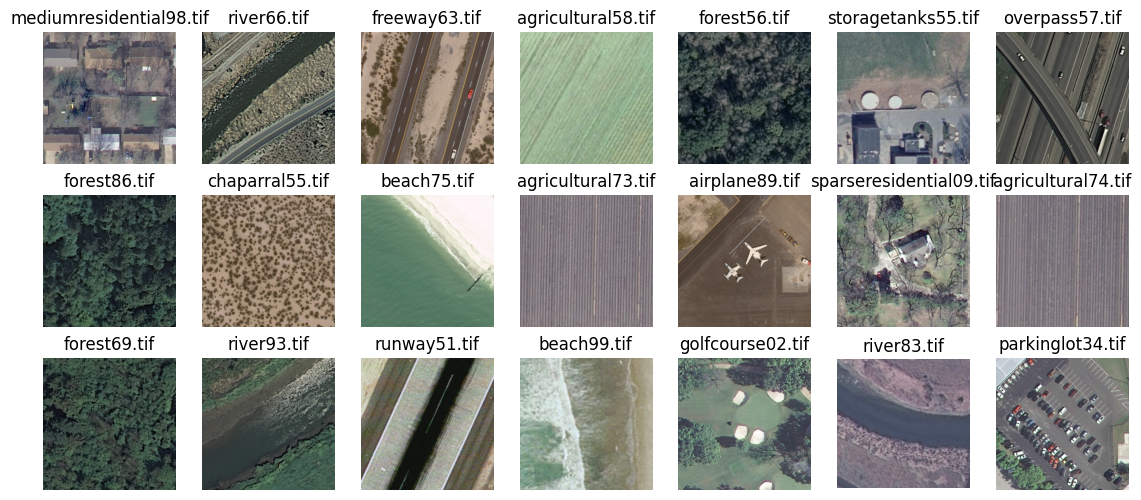

In [ ]:
def get_image():
  f = random.choice(glob('*/*', recursive=True))
  pil_im = Image.open(f, 'r')
  return(pil_im, os.path.basename(f))

rows = 3
columns = 7

fig = plt.figure(figsize=(columns*2, rows*2))

for i in range(rows*columns):
  fig.add_subplot(rows, columns, i+1)
  i, t = get_image()
  plt.axis('off')
  plt.title(t)
  plt.imshow(i)


We also need to normalize the pixel values and convert the class labels into one-hot vectors.

In [ ]:
for i, path in enumerate(classes):
    images = os.listdir(path)

    for a in images:
      image = Image.open(path + '/'+ a)
      image = image.resize((64,64))
      image = np.array(image)
      data.append(image)
      labels.append(i)

data = np.array(data)
labels = np.array(labels)

# Normalize the pixel values
data = data.astype('float32')/255.0

# One-hot encoding of labels
labels = to_categorical(labels)

# Splitting the Data into Train and Test sets

Now, let’s split our dataset into a training set and a test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Building the Model

We will now define our CNN model. The model will have two convolutional layers, followed by max-pooling layers, and two dense layers at the end.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (2, 2), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(21))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 63, 63, 32)        416       
                                                                 
 activation_4 (Activation)   (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                 

# Compiling and Training the Model

Now, we compile and train the model. We use categorical cross-entropy as the loss function and Adam optimizer.

(This may take some time <10mins)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
27/27 [==============================] - 6s 175ms/step - loss: 3.0473 - accuracy: 0.0518 - val_loss: 2.9984 - val_accuracy: 0.0500
Epoch 2/50
27/27 [==============================] - 6s 213ms/step - loss: 2.9646 - accuracy: 0.0530 - val_loss: 2.8723 - val_accuracy: 0.0690
Epoch 3/50
27/27 [==============================] - 5s 168ms/step - loss: 2.8627 - accuracy: 0.1077 - val_loss: 2.7248 - val_accuracy: 0.2119
Epoch 4/50
27/27 [==============================] - 6s 212ms/step - loss: 2.7054 - accuracy: 0.1548 - val_loss: 2.5705 - val_accuracy: 0.2476
Epoch 5/50
27/27 [==============================] - 4s 166ms/step - loss: 2.4915 - accuracy: 0.2298 - val_loss: 2.3177 - val_accuracy: 0.2810
Epoch 6/50
27/27 [==============================] - 4s 165ms/step - loss: 2.2917 - accuracy: 0.2905 - val_loss: 2.1597 - val_accuracy: 0.3524
Epoch 7/50
27/27 [==============================] - 5s 205ms/step - loss: 2.1782 - accuracy: 0.3238 - val_loss: 2.0295 - val_accuracy: 0.3833
Epoch 

# Model evaluation and prediction

We evaluate the model on the test data via `evaluate`.

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("Test loss = %5.2f | Test accuracy = %5.2f" % tuple(results))

Evaluate on test data
4/4 [==============================] - 0s 76ms/step - loss: 1.7298 - accuracy: 0.5405
Test loss =  1.73 | Test accuracy =  0.54


[247, 183, 245, 256, 114, 71, 186, 375, 255, 417, 13, 214, 216, 362, 185, 154, 389, 262, 170, 416, 375]
1/1 [==============================] - 0s 42ms/step


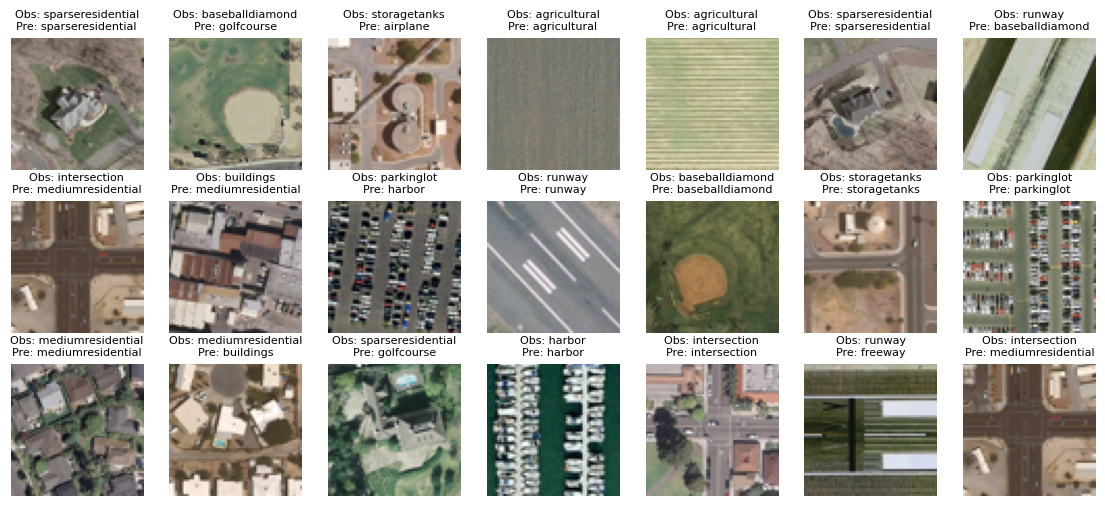

In [ ]:
# Generate predictions using `predict`
rows = 3
columns = 7

# take random test samples
test_idx = [random.randrange(len(X_test)) for i in range(rows*columns)]
print(test_idx)

fig = plt.figure(figsize=(columns*2, rows*2))

predictions = model.predict(X_test[test_idx])
for i, v in enumerate(predictions):
  fig.add_subplot(rows, columns, i+1)
  im = X_test[test_idx][i]
  observed = os.path.basename(classes[y_test[test_idx[i]].argmax()])
  predicted = os.path.basename(classes[v.argmax()])
  t = 'Obs: ' + observed + '\nPre: ' +predicted
  plt.axis('off')
  plt.title(t, fontsize=8)
  plt.imshow(im)